In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('./data/fuel_econ.csv')

In [3]:
fuel_econ.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')

In [5]:
fuel_econ.VClass.unique()

array(['Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars',
       'Minicompact Cars'], dtype=object)

In [6]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

In [7]:
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories= sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

In [8]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [9]:
fuel_econ

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3924,39882,Toyota,Prius Prime,2018,Midsize Cars,Front-Wheel Drive,Automatic (variable gear ratios),Regular Gasoline,4,1.8,...,0,55.2206,78.8197,53.0000,73.6525,54.4329,78,10,10,Automatic
3925,39898,Hyundai,Sonata Hybrid,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,...,106,39.0000,55.9000,44.3066,64.0000,41.0000,217,9,9,Automatic
3926,39899,Hyundai,Sonata Hybrid SE,2018,Midsize Cars,Front-Wheel Drive,Automatic (AM6),Regular Gasoline,4,2.0,...,106,40.0000,56.0000,46.0000,64.0000,42.0000,212,9,9,Automatic
3927,39900,Lexus,LS 500,2018,Midsize Cars,Rear-Wheel Drive,Automatic (S10),Premium Gasoline,6,3.4,...,0,19.2200,24.2000,30.2863,43.4000,23.0021,387,5,5,Automatic


marker can be used for shape of diff categories but takes single string, so we create loop and plot each subset one by one

In [10]:
ttype_markers = [['Automatic', 'o'], ['Manual', '^']]

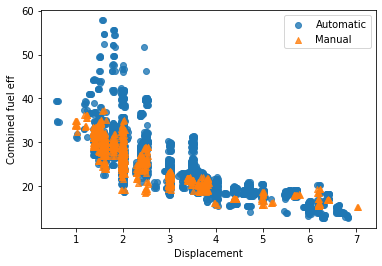

In [15]:
for ttype, marker in ttype_markers:
    plot_data = fuel_econ.loc[fuel_econ['trans_type']==ttype]
    sb.regplot(data=plot_data, x= 'displ', y='comb',
          x_jitter=0.04, fit_reg=False,
           marker = marker)

plt.xlabel('Displacement')
plt.ylabel('Combined fuel eff')
plt.legend(['Automatic', 'Manual'])

#### we already plotted displ and comb with trans as shape, we can still add co2 since its numeric as size 

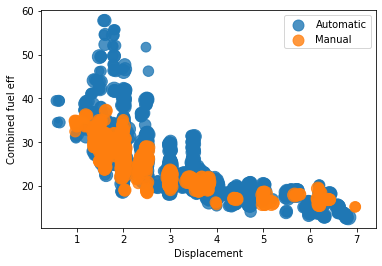

In [18]:
for ttype, marker in ttype_markers:
    plot_data = fuel_econ.loc[fuel_econ['trans_type']==ttype]
    sb.regplot(data=plot_data, x= 'displ', y='comb',
          x_jitter=0.04, fit_reg=False,
           scatter_kws={'s': fuel_econ['co2']/2})

plt.xlabel('Displacement')
plt.ylabel('Combined fuel eff')
plt.legend(['Automatic', 'Manual'])